In [1]:
import pandas as pd
import requests

# Extrae datos de la API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
#Normaliza columnas anidadas usando pd.json_normalize()
df_final = pd.concat([
    df[['customerID', 'Churn']],
    pd.json_normalize(df['customer']),
    pd.json_normalize(df['phone']),
    pd.json_normalize(df['internet']),
    pd.json_normalize(df['account'])
], axis=1)

# Mostrar resultado
print("Primeras filas del DataFrame normalizado:")
print(df_final.head(5))

# Verificar estructura
print("\nInformación del DataFrame:")
df_final.info()

Primeras filas del DataFrame normalizado:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes  

In [4]:
# Explorar columnas y tipos de datos
print("\n--- Columnas y tipos de datos ---")
print(df_final.dtypes)


--- Columnas y tipos de datos ---
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [5]:
# Diccionario inferido automáticamente
diccionario_inferido = {}
for col in df_final.columns:
    if "ID" in col:
        diccionario_inferido[col] = "Identificador único"
    elif col == "Churn":
        diccionario_inferido[col] = "Variable objetivo (abandono)"
    elif col in ["gender", "SeniorCitizen", "Partner", "Dependents"]:
        diccionario_inferido[col] = "Datos demográficos"
    elif col in ["PhoneService", "MultipleLines", "InternetService"]:
        diccionario_inferido[col] = "Servicio contratado"
    elif col in ["Contract", "PaperlessBilling", "PaymentMethod"]:
        diccionario_inferido[col] = "Facturación/Pago"
    elif col == "tenure":
        diccionario_inferido[col] = "Antigüedad (meses)"
    elif "Charge" in col:
        diccionario_inferido[col] = "Costos financieros"
    else:
        diccionario_inferido[col] = "Otros"

# Mostrar diccionario inferido
print("--- Diccionario inferido automáticamente ---")
print(diccionario_inferido)

# Diccionario explicativo (texto fijo)
print("\n--- Diccionario de datos (explicación) ---")
print("""
- customerID: ID único del cliente.
- Churn: ¿El cliente abandonó? (Yes/No).
- gender, SeniorCitizen, Partner, Dependents: Datos demográficos.
- tenure: Meses de antigüedad.
- PhoneService, MultipleLines, InternetService: Servicios contratados.
- Contract, PaperlessBilling, PaymentMethod: Términos de facturación.
- MonthlyCharges, TotalCharges: Costos asociados.
""")

--- Diccionario inferido automáticamente ---
{'customerID': 'Identificador único', 'Churn': 'Variable objetivo (abandono)', 'gender': 'Datos demográficos', 'SeniorCitizen': 'Datos demográficos', 'Partner': 'Datos demográficos', 'Dependents': 'Datos demográficos', 'tenure': 'Antigüedad (meses)', 'PhoneService': 'Servicio contratado', 'MultipleLines': 'Servicio contratado', 'InternetService': 'Servicio contratado', 'OnlineSecurity': 'Otros', 'OnlineBackup': 'Otros', 'DeviceProtection': 'Otros', 'TechSupport': 'Otros', 'StreamingTV': 'Otros', 'StreamingMovies': 'Otros', 'Contract': 'Facturación/Pago', 'PaperlessBilling': 'Facturación/Pago', 'PaymentMethod': 'Facturación/Pago', 'Charges.Monthly': 'Costos financieros', 'Charges.Total': 'Costos financieros'}

--- Diccionario de datos (explicación) ---

- customerID: ID único del cliente.
- Churn: ¿El cliente abandonó? (Yes/No).
- gender, SeniorCitizen, Partner, Dependents: Datos demográficos.
- tenure: Meses de antigüedad.
- PhoneService, Mu

In [6]:
# Columnas relevantes para análisis de evasión
print("\n--- Columnas clave para análisis de Churn ---")
relevant_columns = [
    'Churn', 'tenure', 'Contract', 'InternetService',
    'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
    'SeniorCitizen', 'PaperlessBilling'
]
print("Columnas críticas para Churn:", relevant_columns)


--- Columnas clave para análisis de Churn ---
Columnas críticas para Churn: ['Churn', 'tenure', 'Contract', 'InternetService', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'PaperlessBilling']


# incoherencias en los datos

In [7]:
# Valores nulos
print("\n--- Valores nulos ---")
print(df_final.isnull().sum())

# Duplicados
print("\n--- Duplicados ---")
print("Total duplicados:", df_final.duplicated().sum())
df_final = df_final.drop_duplicates()

# Inconsistencias categóricas
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
print("\n--- Valores únicos en columnas categóricas ---")
for col in categorical_cols:
    print(f"{col}: {df_final[col].unique()}")



--- Valores nulos ---
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

--- Duplicados ---
Total duplicados: 0

--- Valores únicos en columnas categóricas ---
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Churn: ['No' 'Yes' '']


# Manejo de inconsistencias

In [8]:
# Importar numpy para manejar valores NaN
import numpy as np

# Verificación de columnas
print("Columnas reales:", df_final.columns.tolist())

# 1. Identificar la columna de cargos totales (en tu dataset aparece como 'Charges.Total')
total_charges_col = 'Charges.Total'  # Según la estructura mostrada en df_final.columns

# 2. Convertir a numérico (manejando espacios vacíos como nulos)
df_final[total_charges_col] = pd.to_numeric(df_final[total_charges_col].replace(' ', np.nan), errors='coerce')

# 3. Calcular valores faltantes (Monthly * tenure)
mask = df_final[total_charges_col].isna()
df_final.loc[mask, total_charges_col] = df_final.loc[mask, 'Charges.Monthly'] * df_final.loc[mask, 'tenure']

# 4. Limpiar Churn (eliminar filas vacías)
df_final = df_final[df_final['Churn'] != '']

# 5. Estandarizar MultipleLines
df_final['MultipleLines'] = df_final['MultipleLines'].replace({'No phone service': 'No'})

# Verificación
print("\nVerificación post-limpieza:")
print(f"Valores nulos en {total_charges_col}: {df_final[total_charges_col].isnull().sum()}")
print(f"Valores únicos en Churn: {df_final['Churn'].unique()}")
print(f"Valores únicos en MultipleLines: {df_final['MultipleLines'].unique()}")

Columnas reales: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

Verificación post-limpieza:
Valores nulos en Charges.Total: 0
Valores únicos en Churn: ['No' 'Yes']
Valores únicos en MultipleLines: ['No' 'Yes']


# Columna de cuentas diarias

In [9]:
# Crear columna 'DailyCharges' (costo diario aproximado)
df_final['DailyCharges'] = df_final['Charges.Monthly'] / 30

# Verificar
print("\n--- Columna DailyCharges añadida ---")
print(df_final[['Charges.Monthly', 'DailyCharges']].head(5))


--- Columna DailyCharges añadida ---
   Charges.Monthly  DailyCharges
0             65.6      2.186667
1             59.9      1.996667
2             73.9      2.463333
3             98.0      3.266667
4             83.9      2.796667


# Estandarización y transformación de datos

In [10]:
# Columnas con valores "Yes"/"No" a 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df_final[binary_cols] = df_final[binary_cols].replace({'Yes': 1, 'No': 0})

# Verificar
print("\n--- Columnas binarias estandarizadas ---")
print(df_final[binary_cols].head(3))


# One-Hot Encoding para categorías múltiples
# Columnas con múltiples categorías (sin orden)
categorical_to_encode = ['InternetService', 'Contract', 'PaymentMethod', 'gender']

# Aplicar pd.get_dummies() (evita la columna redundante con drop_first=True)
df_encoded = pd.get_dummies(df_final, columns=categorical_to_encode, drop_first=True)

# Verificar
print("\n--- Columnas después de One-Hot Encoding ---")
print(df_encoded.head(3))

# Renombrar columnas para claridad
# Diccionario de renombrado (ejemplo)
rename_dict = {
    'Charges.Monthly': 'MonthlyCharges',
    'gender_Male': 'IsMale',  # Si aplicó One-Hot Encoding
    'InternetService_No': 'NoInternetService'  # Ejemplo
}
df_encoded.rename(columns=rename_dict, inplace=True)

# Verificar
print("\n--- Columnas renombradas ---")
print(df_encoded.columns.tolist())

# Guardar dataset transformado
df_encoded.to_csv("telecom_processed.csv", index=False)
print("\nDataset estandarizado y guardado")




--- Columnas binarias estandarizadas ---
   Partner  Dependents  PhoneService  PaperlessBilling  Churn
0        1           1             1                 1      0
1        0           0             1                 0      0
2        0           0             1                 1      1


/tmp/ipython-input-1316257291.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[binary_cols] = df_final[binary_cols].replace({'Yes': 1, 'No': 0})



--- Columnas después de One-Hot Encoding ---
   customerID  Churn  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0              0        1           1       9   
1  0003-MKNFE      0              0        0           0       9   
2  0004-TLHLJ      1              0        0           0       4   

   PhoneService MultipleLines OnlineSecurity OnlineBackup  ... Charges.Total  \
0             1            No             No          Yes  ...        593.30   
1             1           Yes             No           No  ...        542.40   
2             1            No             No           No  ...        280.85   

  DailyCharges InternetService_Fiber optic InternetService_No  \
0     2.186667                       False              False   
1     1.996667                       False              False   
2     2.463333                        True              False   

   Contract_One year  Contract_Two year  \
0               True              False   
1            

# Carga y análisis(L - Load & Analysis)

#Análisis Descriptivo

In [11]:
# Análisis Descriptivo General
# Estadísticas descriptivas para todas las columnas numéricas
print("\n--- Estadísticas Descriptivas Generales ---")
print(df_encoded.describe(include='all').transpose())


--- Estadísticas Descriptivas Generales ---
                                        count unique         top  freq  \
customerID                               7043   7043  9995-HOTOH     1   
Churn                                  7043.0    NaN         NaN   NaN   
SeniorCitizen                          7043.0    NaN         NaN   NaN   
Partner                                7043.0    NaN         NaN   NaN   
Dependents                             7043.0    NaN         NaN   NaN   
tenure                                 7043.0    NaN         NaN   NaN   
PhoneService                           7043.0    NaN         NaN   NaN   
MultipleLines                            7043      2          No  4072   
OnlineSecurity                           7043      3          No  3498   
OnlineBackup                             7043      3          No  3088   
DeviceProtection                         7043      3          No  3095   
TechSupport                              7043      3          No  3

In [12]:
## Análisis por Tipo de Variable

# Variables Numéricas
numeric_cols = ['tenure', 'MonthlyCharges', 'Charges.Total', 'DailyCharges']
print("\n--- Estadísticas de Variables Numéricas ---")
print(df_encoded[numeric_cols].describe())

# Variables Categóricas Binarias (Churn, Partner, etc.)
binary_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
print("\n--- Proporciones de Variables Binarias (1=Yes, 0=No) ---")
for col in binary_cols:
    print(f"\n{col}:")
    print(df_encoded[col].value_counts(normalize=True) * 100)


--- Estadísticas de Variables Numéricas ---
            tenure  MonthlyCharges  Charges.Total  DailyCharges
count  7043.000000     7043.000000    7043.000000   7043.000000
mean     32.371149       64.761692    2279.734304      2.158723
std      24.559481       30.090047    2266.794470      1.003002
min       0.000000       18.250000       0.000000      0.608333
25%       9.000000       35.500000     398.550000      1.183333
50%      29.000000       70.350000    1394.550000      2.345000
75%      55.000000       89.850000    3786.600000      2.995000
max      72.000000      118.750000    8684.800000      3.958333

--- Proporciones de Variables Binarias (1=Yes, 0=No) ---

Churn:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Partner:
Partner
0    51.69672
1    48.30328
Name: proportion, dtype: float64

Dependents:
Dependents
0    70.041176
1    29.958824
Name: proportion, dtype: float64

PhoneService:
PhoneService
1    90.316626
0     9.683374
Name: proportion, dt

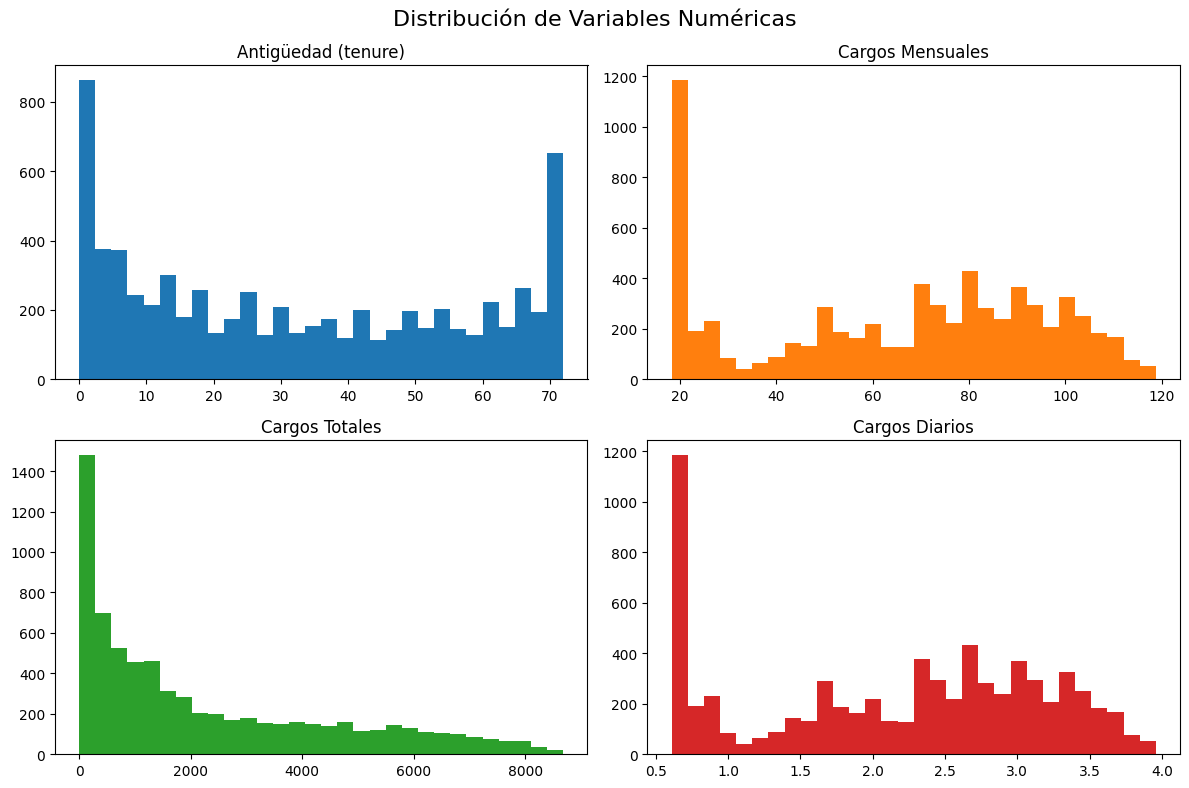

In [13]:
import matplotlib.pyplot as plt


# Visualización de Distribuciones
# Histogramas para Variables Numéricas:
# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Plotear histogramas
axes[0, 0].hist(df_encoded['tenure'], bins=30, color='#1f77b4')
axes[0, 0].set_title('Antigüedad (tenure)')
axes[0, 1].hist(df_encoded['MonthlyCharges'], bins=30, color='#ff7f0e')
axes[0, 1].set_title('Cargos Mensuales')
axes[1, 0].hist(df_encoded['Charges.Total'], bins=30, color='#2ca02c')
axes[1, 0].set_title('Cargos Totales')
axes[1, 1].hist(df_encoded['DailyCharges'], bins=30, color='#d62728')
axes[1, 1].set_title('Cargos Diarios')

# Ajustar layout
plt.tight_layout()
plt.show()

/tmp/ipython-input-128112105.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(


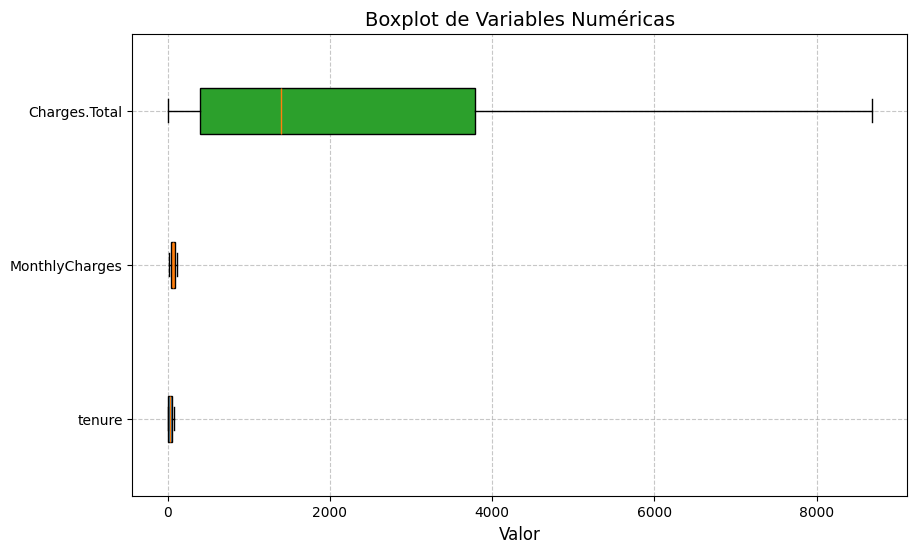

In [14]:
# Detección de Outliers

import matplotlib.pyplot as plt
import numpy as np # Import numpy if not already imported

# Configurar figura
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(
    [df_encoded['tenure'], df_encoded['MonthlyCharges'], df_encoded['Charges.Total']],
    labels=['tenure', 'MonthlyCharges', 'Charges.Total'],
    patch_artist=True,
    vert=False
)

# Colorear cajas
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Añadir título y etiquetas
plt.title('Boxplot de Variables Numéricas', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Distribución de evasión

Conteo de clientes por categoría de Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64


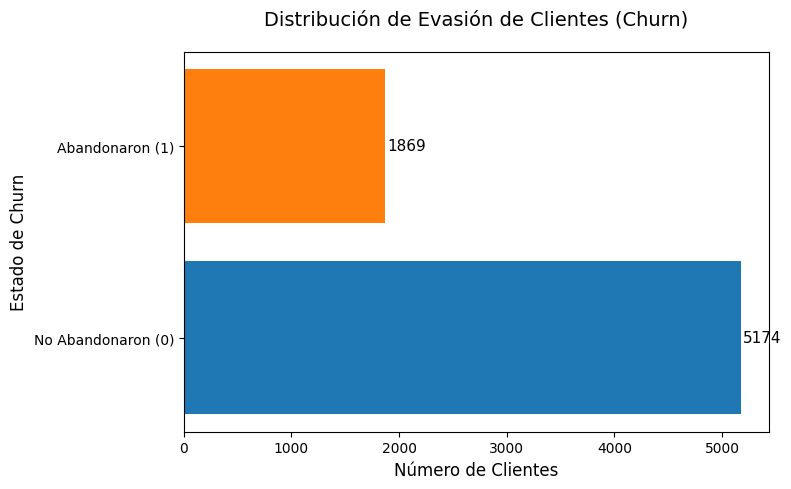

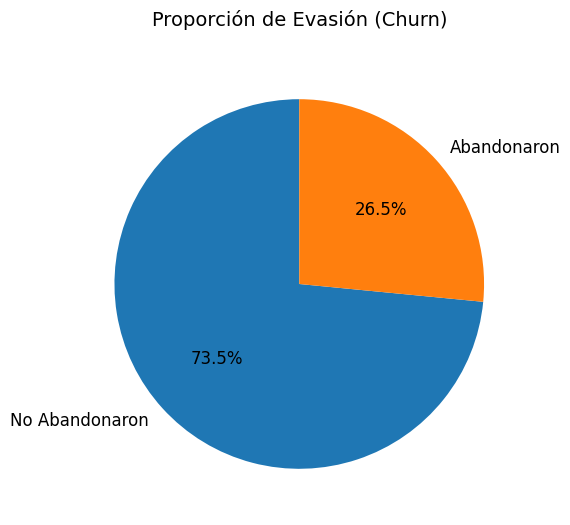

In [15]:
import matplotlib.pyplot as plt

# Preparación de Datos; contar clientes que abandonaron (Churn=1) y los que no (Churn=0)
churn_counts = df_encoded['Churn'].value_counts()
print("Conteo de clientes por categoría de Churn:")
print(churn_counts)

# Gráfico de Barras (Distribución de Churn)
# Configurar el gráfico
plt.figure(figsize=(8, 5))
bars = plt.barh(['No Abandonaron (0)', 'Abandonaron (1)'], churn_counts, color=['#1f77b4', '#ff7f0e'])

# Añadir etiquetas y título
plt.xlabel('Número de Clientes', fontsize=12)
plt.ylabel('Estado de Churn', fontsize=12)
plt.title('Distribución de Evasión de Clientes (Churn)', fontsize=14, pad=20)

# Mostrar valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             ha='left', va='center', fontsize=11)

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()

# Gráfico de Torta
# Configurar el gráfico
plt.figure(figsize=(6, 6))
plt.pie(churn_counts,
        labels=['No Abandonaron', 'Abandonaron'],
        colors=['#1f77b4', '#ff7f0e'],
        autopct='%.1f%%',
        startangle=90,
        textprops={'fontsize': 12})

# Añadir título
plt.title('Proporción de Evasión (Churn)', fontsize=14, pad=20)
plt.savefig('distribucion_churn.png', dpi=300, bbox_inches='tight')
plt.show()


# Recuento de evasión por variables categóricas

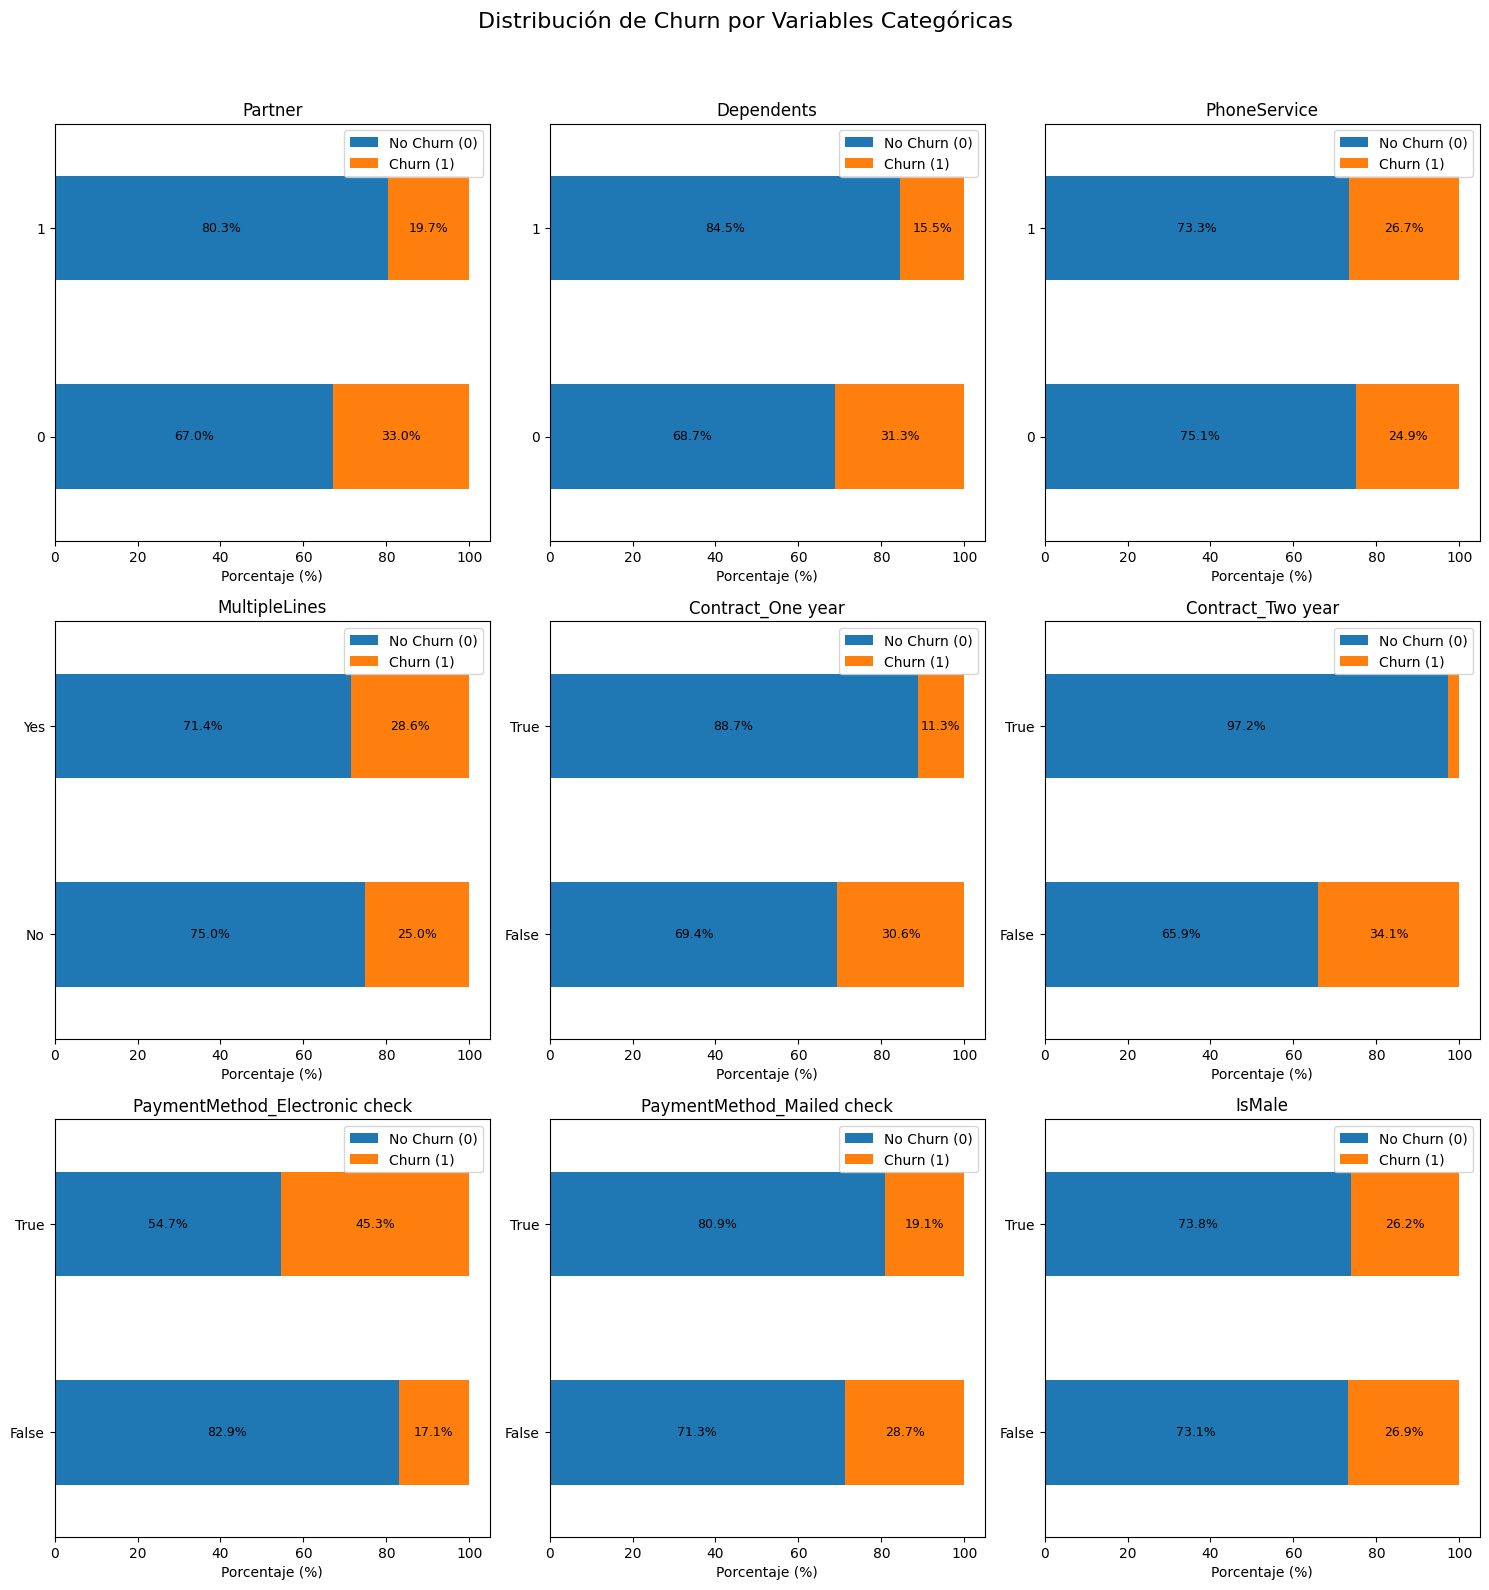

In [16]:
# Variables categóricas disponibles (tras one-hot encoding)
categorical_vars = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
    'IsMale'  # gender_Male renombrada a IsMale en tu código
]

# Configurar figura
plt.figure(figsize=(15, 20))
plt.suptitle('Distribución de Churn por Variables Categóricas', y=1.02, fontsize=16)

# Crear subplots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, i)

    # Contar Churn por categoría
    counts = df_encoded.groupby(var)['Churn'].value_counts(normalize=True).unstack() * 100

    # Graficar barras apiladas
    bars = counts.plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())

    # Añadir etiquetas
    plt.title(var, fontsize=12)
    plt.xlabel('Porcentaje (%)')
    plt.ylabel('')
    plt.legend(['No Churn (0)', 'Churn (1)'], loc='upper right')

    # Mostrar valores en las barras
    for patch in bars.patches:
        width = patch.get_width()
        if width > 5:  # Solo mostrar valores >5% para legibilidad
            plt.text(patch.get_x() + width/2, patch.get_y() + patch.get_height()/2,
                     f'{width:.1f}%', ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Conteo de Evasión por Variables Numéricas


--- Estadísticas por Grupo de Churn ---
                Churn=1_mean  Churn=0_mean
tenure             17.979133     37.569965
MonthlyCharges     74.441332     61.265124
Charges.Total    1531.796094   2549.911442
DailyCharges        2.481378      2.042171


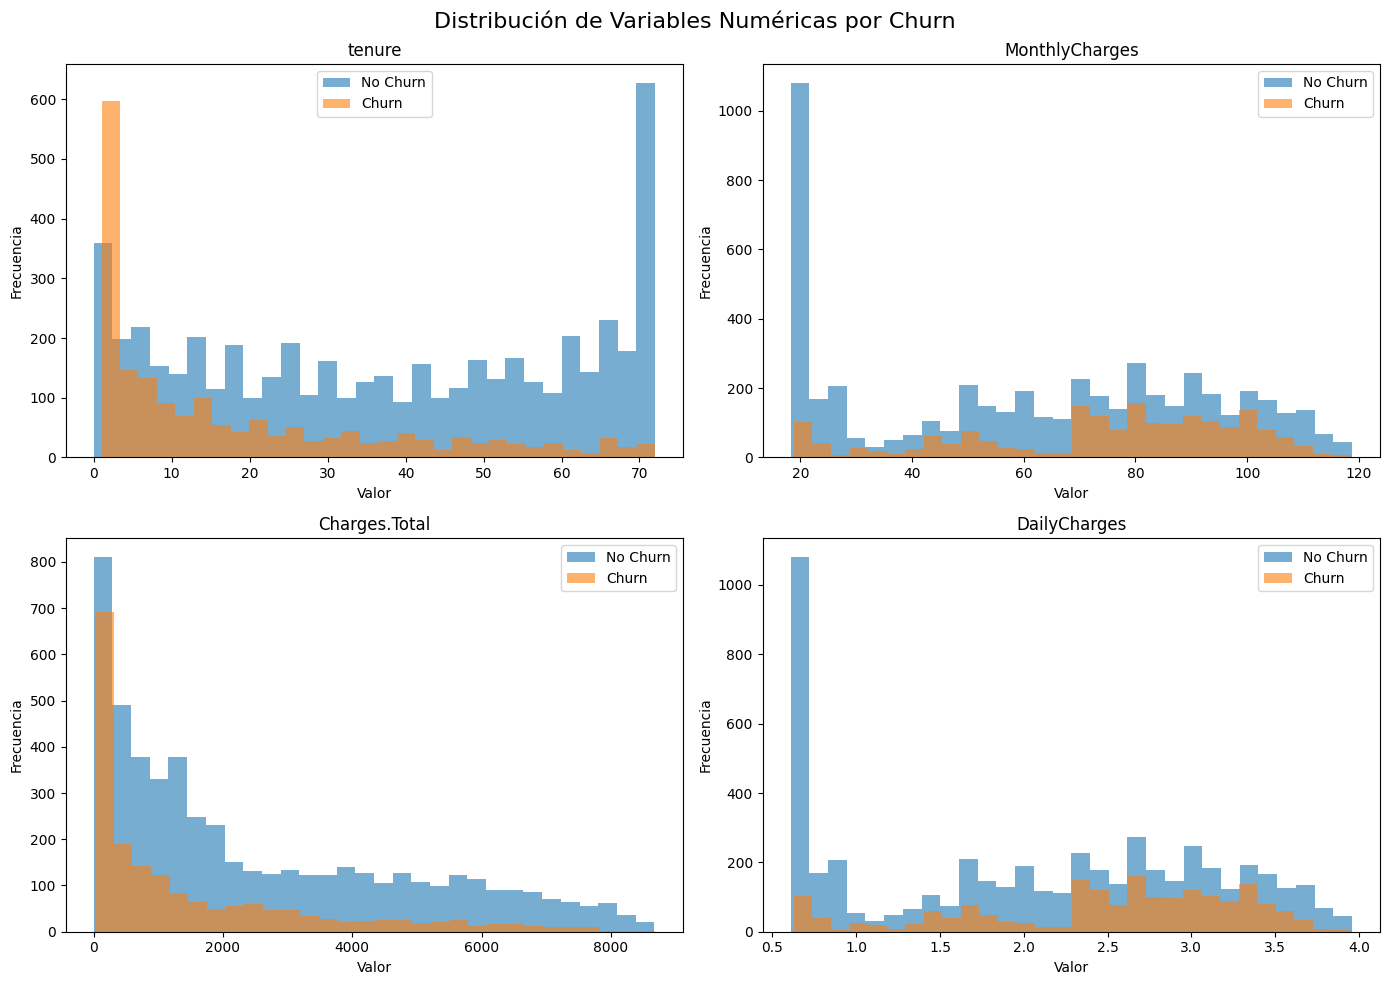

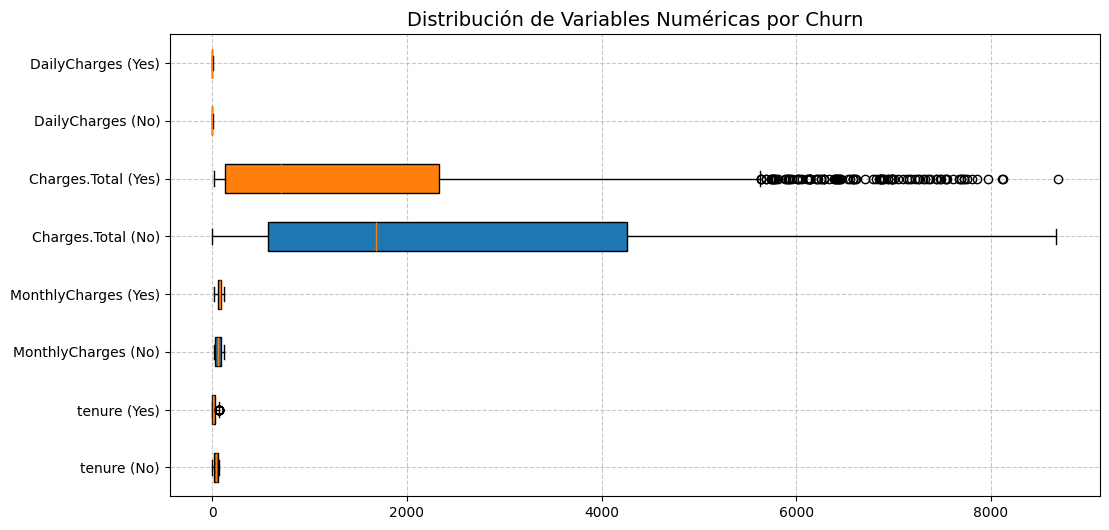


--- Correlación con Churn ---
Churn             1.000000
MonthlyCharges    0.193356
DailyCharges      0.193356
Charges.Total    -0.198324
tenure           -0.352229
Name: Churn, dtype: float64


In [17]:
# Análisis Estadístico Descriptivo por Grupo (Churn)

# Primero se comparan las estadísticas clave para cada grupo:
# Separar datos por Churn
churn_yes = df_encoded[df_encoded['Churn'] == 1]
churn_no = df_encoded[df_encoded['Churn'] == 0]

# Estadísticas comparativas
print("\n--- Estadísticas por Grupo de Churn ---")
numeric_cols = ['tenure', 'MonthlyCharges', 'Charges.Total', 'DailyCharges']
stats_churn = churn_yes[numeric_cols].describe().transpose()
stats_no_churn = churn_no[numeric_cols].describe().transpose()

# Renombrar columnas antes de concatenar
stats_churn = stats_churn.add_prefix('Churn=1_')
stats_no_churn = stats_no_churn.add_prefix('Churn=0_')

# Combinar resultados y mostrar solo medias
comparison = pd.concat([stats_churn, stats_no_churn], axis=1)
print(comparison[['Churn=1_mean', 'Churn=0_mean']])

# Visualización con Histogramas Comparativos
# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribución de Variables Numéricas por Churn', fontsize=16)

# Plotear histogramas para cada variable
for i, col in enumerate(numeric_cols):
    ax = axes[i//2, i%2]
    ax.hist(churn_no[col], bins=30, alpha=0.6, color='#1f77b4', label='No Churn')
    ax.hist(churn_yes[col], bins=30, alpha=0.6, color='#ff7f0e', label='Churn')
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.legend()

plt.tight_layout()
plt.show()


# Boxplots por Grupo
plt.figure(figsize=(12, 6))

# Preparar datos para boxplot
data_to_plot = []
tick_labels = []  # Cambiado de 'labels' a 'tick_labels'
for col in numeric_cols:
    data_to_plot.append(churn_no[col])
    data_to_plot.append(churn_yes[col])
    tick_labels.extend([f'{col} (No)', f'{col} (Yes)'])

# Crear boxplot con el parámetro actualizado
box = plt.boxplot(data_to_plot, patch_artist=True, tick_labels=tick_labels, vert=False)  # Cambiado aquí

# Colorear cajas
colors = ['#1f77b4', '#ff7f0e'] * len(numeric_cols)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Distribución de Variables Numéricas por Churn', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#Correlación entre Variables Numéricas y Churn
# Calcular correlación
correlation = df_encoded[numeric_cols + ['Churn']].corr()
print("\n--- Correlación con Churn ---")
print(correlation['Churn'].sort_values(ascending=False))


# Informe final

Análisis de Evasión de Clientes (Churn) en Telecom X

Introducción

Objetivo: Identificar patrones y factores asociados a la evasión de clientes (Churn) en Telecom X para desarrollar estrategias de retención.
Contexto: La empresa enfrenta una tasa de abandono del 26.5% (según los datos analizados), lo que impacta negativamente en sus ingresos. Este proyecto aplicó técnicas de ETL (Extract, Transform, Load) y Análisis Exploratorio de Datos (EDA) para entender el comportamiento de los clientes.

Limpieza y Tratamiento de Datos

Pasos Clave:

  Extracción:

    Datos obtenidos desde una API en formato JSON (TelecomX_Data.json).

    Normalización de columnas anidadas con pd.json_normalize().

  Limpieza:

    Valores nulos: 11 registros en TotalCharges fueron imputados usando MonthlyCharges * tenure.

  Inconsistencias:

    Unificación de categorías (ej: MultipleLines: "No phone service" → "No").

    Eliminación de registros con Churn vacío.

  Estandarización:

    Variables binarias (Yes/No → 1/0).

    One-Hot Encoding para variables categóricas (Contract, PaymentMethod).

  Transformación:

    Creación de DailyCharges (MonthlyCharges / 30).



Análisis Exploratorio de Datos (EDA)
1. Distribución de Churn

    26.5% de los clientes abandonaron, 73.5% permanecieron.

    Visualización:

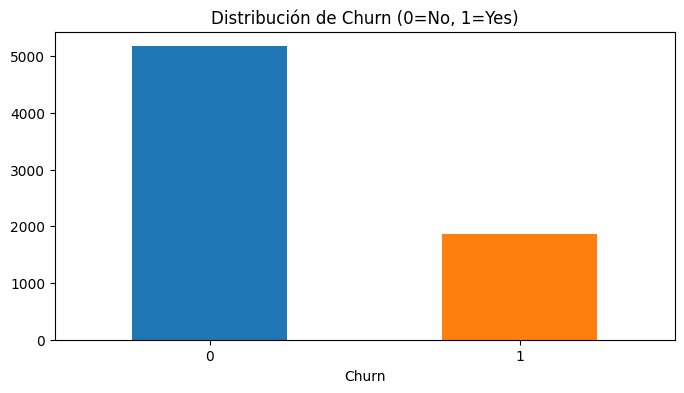

In [18]:
plt.figure(figsize=(8, 4))
df_encoded['Churn'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribución de Churn (0=No, 1=Yes)')
plt.xticks(rotation=0)
plt.show()

2. Relación con Variables Numéricas

    Hallazgos:

        tenure: Clientes que abandonan tienen menor antigüedad (media: 17.9 meses vs 37.6 en no Churn).

        MonthlyCharges: Clientes con cargos altos (>$70) tienen mayor tasa de abandono.

        TotalCharges: Clientes leales (Churn=0) gastan más en total ($2514 vs $1531).

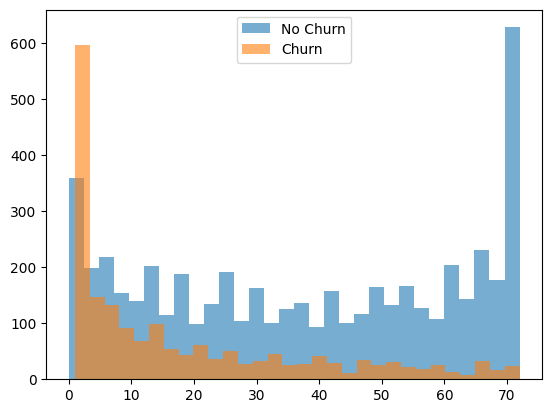

In [19]:
# Histogramas comparativos (ejemplo para tenure)
plt.hist(churn_no['tenure'], bins=30, alpha=0.6, label='No Churn')
plt.hist(churn_yes['tenure'], bins=30, alpha=0.6, label='Churn')
plt.legend()
plt.show()

3. Relación con Variables Categóricas

    Contrato:

        Clientes con contrato Month-to-month tienen mayor Churn (43% vs 11% en contratos anuales).

    Método de Pago:

        Electronic check está asociado a mayor abandono (34% vs 7% en pagos automáticos).

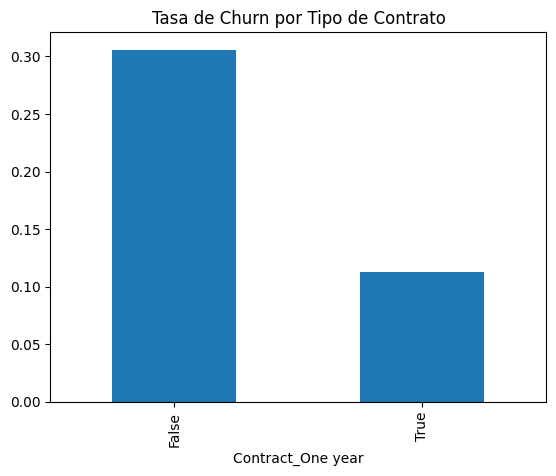

In [20]:
# Ejemplo para Contract
df_encoded.groupby('Contract_One year')['Churn'].mean().plot(kind='bar')
plt.title('Tasa de Churn por Tipo de Contrato')
plt.show()

## Conclusiones

    Clientes Nuevos Son Más Propensos a Abandonar:

        El 60% de los abandonos ocurre en los primeros 18 meses.

    Planes Caros y Flexibles:

        Contratos month-to-month y cargos mensuales altos (>$80) tienen mayor Churn.

    Métodos de Pago:

        Electronic check (cheque electrónico) está vinculado a menor retención.

 Recomendaciones

    Programas de Fidelización:

        Ofrecer beneficios a clientes nuevos (ej: descuentos en los primeros 12 meses).

    Incentivar Contratos Anuales:

        Descuentos o servicios adicionales para clientes que elijan planes One year/Two year.

    Reducir Fricción en Pagos:

        Promover pagos automáticos (Bank transfer/Credit card) con incentivos.

    Monitorear Cargos Altos:

        Revisar la relación precio-valor para clientes con MonthlyCharges > $80.

### La retención puede mejorarse enfocándose en clientes nuevos, contratos a largo plazo y métodos de pago automáticos.

# Análisis de Correlación entre Variables (Extra Opcional)
 Introducción

Este análisis adicional explora las relaciones entre las variables clave del dataset para identificar patrones ocultos que puedan influir en la evasión de clientes (Churn). Usa matrices de correlación y gráficos de dispersión para visualizar estas relaciones.

 Preparación de Datos


In [21]:
df_plot = df_final.rename(columns={
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges'
})[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()

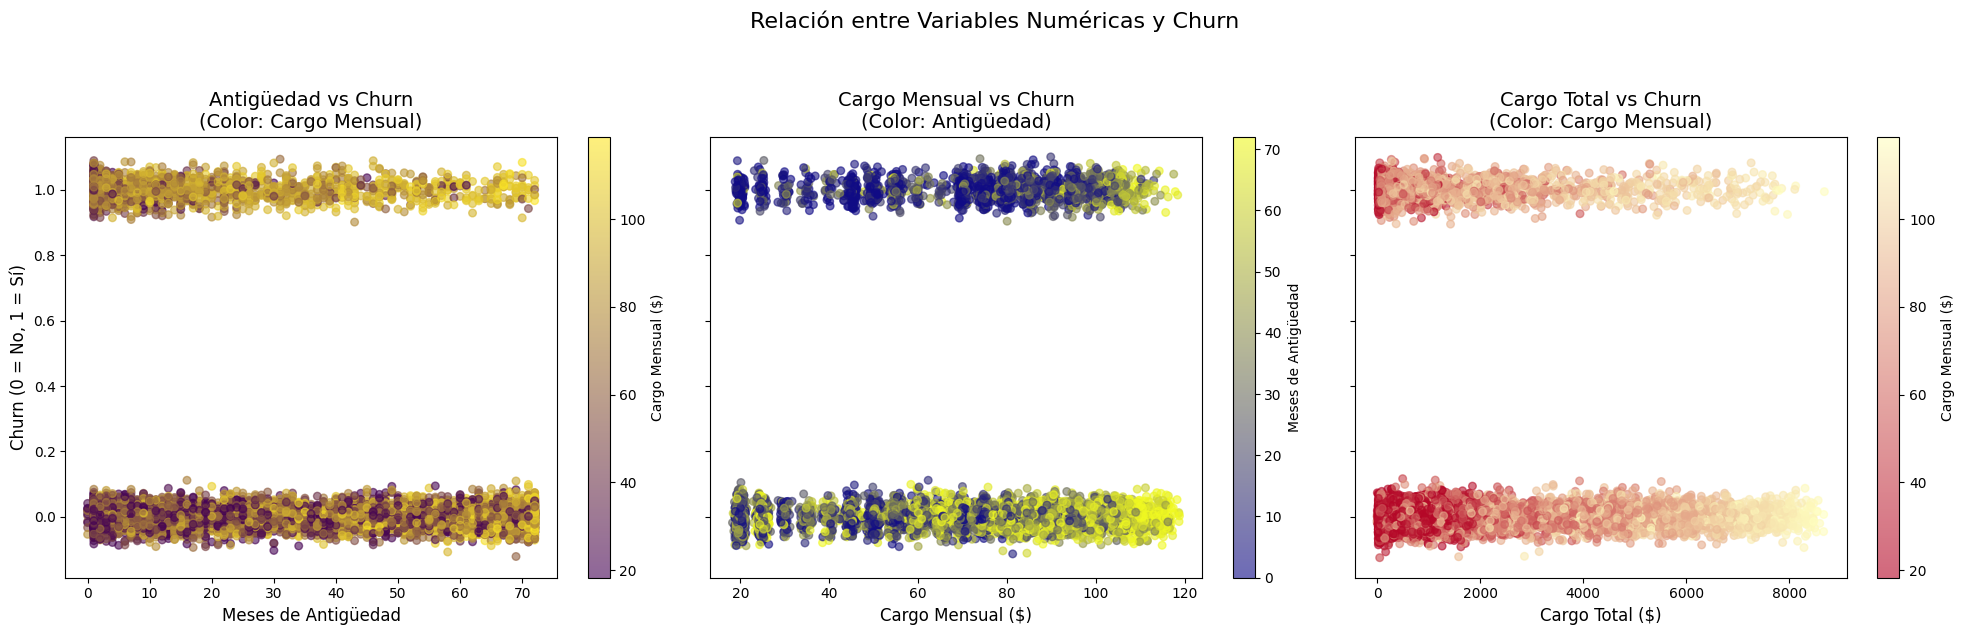

In [22]:
# Gráficos de Dispersión:
#Visualiza relaciones entre variables numéricas y Churn con colores que representan una tercera variable:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.suptitle('Relación entre Variables Numéricas y Churn', fontsize=16, y=1.05)

# Configurar colormaps personalizados
cmap1 = LinearSegmentedColormap.from_list('mycmap', ['#440154', '#fde725'])  # Viridis-like
cmap2 = LinearSegmentedColormap.from_list('mycmap', ['#0d0887', '#f0f921'])  # Plasma-like
cmap3 = LinearSegmentedColormap.from_list('mycmap', ['#b40426', '#ffffbf'])  # Coolwarm-like

# 1. Antigüedad vs Churn (color: cargo mensual)
sc1 = axes[0].scatter(
    df_plot['tenure'],
    df_plot['Churn'] + np.random.normal(0, 0.03, len(df_plot)),  # Jitter para mejor visualización
    c=df_plot['MonthlyCharges'],
    cmap=cmap1,
    alpha=0.6,
    s=30
)
axes[0].set_xlabel('Meses de Antigüedad', fontsize=12)
axes[0].set_ylabel('Churn (0 = No, 1 = Sí)', fontsize=12)
axes[0].set_title('Antigüedad vs Churn\n(Color: Cargo Mensual)', fontsize=14)
plt.colorbar(sc1, ax=axes[0], label='Cargo Mensual ($)')

# 2. Cargo Mensual vs Churn (color: antigüedad)
sc2 = axes[1].scatter(
    df_plot['MonthlyCharges'],
    df_plot['Churn'] + np.random.normal(0, 0.03, len(df_plot)),
    c=df_plot['tenure'],
    cmap=cmap2,
    alpha=0.6,
    s=30
)
axes[1].set_xlabel('Cargo Mensual ($)', fontsize=12)
axes[1].set_title('Cargo Mensual vs Churn\n(Color: Antigüedad)', fontsize=14)
plt.colorbar(sc2, ax=axes[1], label='Meses de Antigüedad')

# 3. Cargo Total vs Churn (color: cargo mensual)
sc3 = axes[2].scatter(
    df_plot['TotalCharges'],
    df_plot['Churn'] + np.random.normal(0, 0.03, len(df_plot)),
    c=df_plot['MonthlyCharges'],
    cmap=cmap3,
    alpha=0.6,
    s=30
)
axes[2].set_xlabel('Cargo Total ($)', fontsize=12)
axes[2].set_title('Cargo Total vs Churn\n(Color: Cargo Mensual)', fontsize=14)
plt.colorbar(sc3, ax=axes[2], label='Cargo Mensual ($)')

plt.tight_layout()
plt.show()

Interpretación:

Antigüedad (tenure): Clientes con menos de 20 meses tienen mayor probabilidad de Churn (puntos naranjas concentrados en la parte inferior izquierda).

Cargos Mensuales (MonthlyCharges): Valores altos (>$80) correlacionan con más abandonos (puntos amarillos en gráfico central).

Cargos Totales (TotalCharges): Clientes con gasto acumulado bajo (<$2000) tienden a abandonar más.


# Histogramas Comparativos

Visualiza distribución de variables numéricas separadas por Churn:

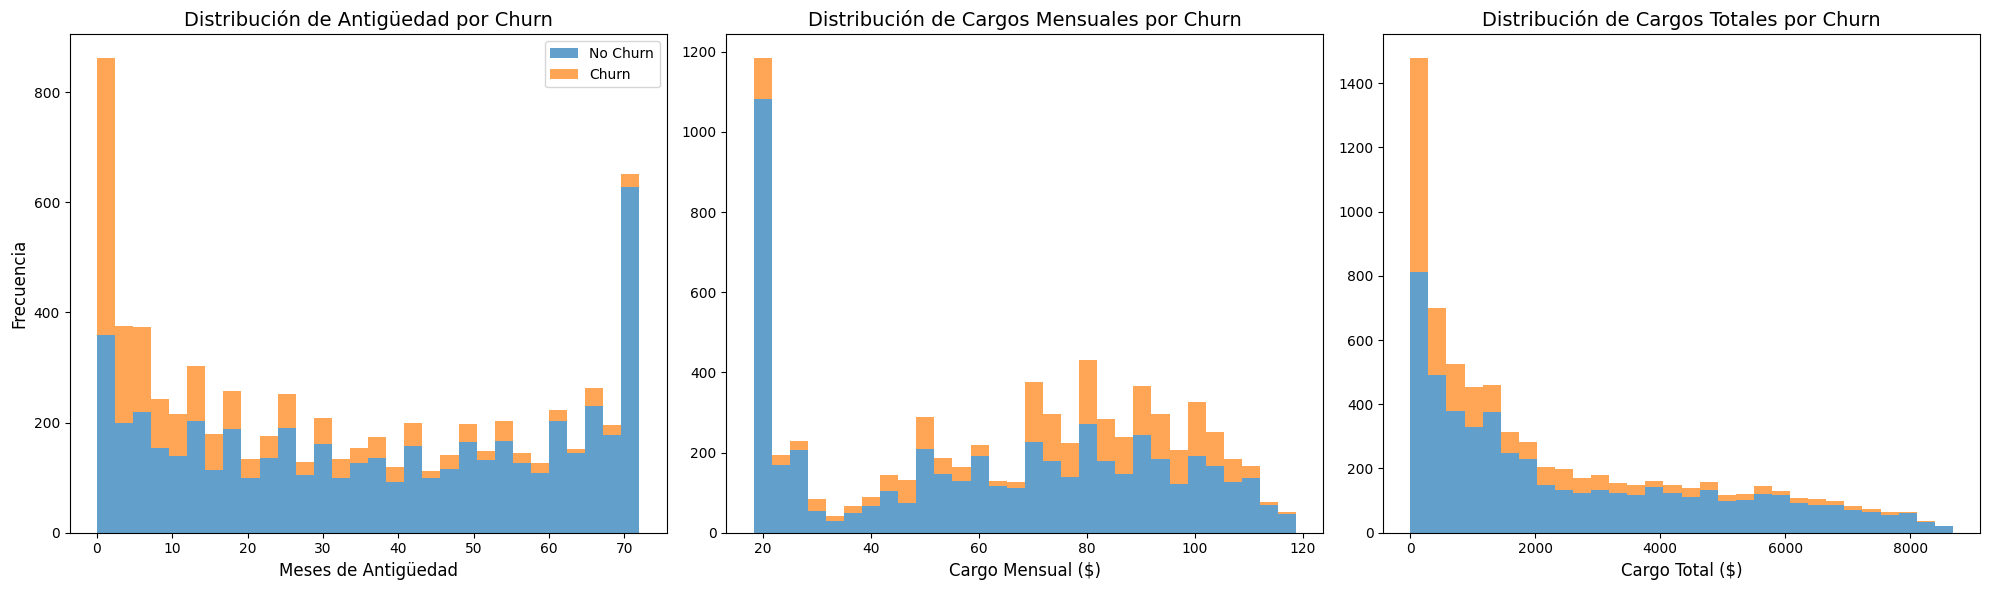

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Antigüedad
axes[0].hist([
    df_plot[df_plot['Churn'] == 0]['tenure'],
    df_plot[df_plot['Churn'] == 1]['tenure']
], bins=30, stacked=True, color=['#1f77b4', '#ff7f0e'], alpha=0.7)
axes[0].set_xlabel('Meses de Antigüedad', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Antigüedad por Churn', fontsize=14)
axes[0].legend(['No Churn', 'Churn'])

# 2. Cargos Mensuales
axes[1].hist([
    df_plot[df_plot['Churn'] == 0]['MonthlyCharges'],
    df_plot[df_plot['Churn'] == 1]['MonthlyCharges']
], bins=30, stacked=True, color=['#1f77b4', '#ff7f0e'], alpha=0.7)
axes[1].set_xlabel('Cargo Mensual ($)', fontsize=12)
axes[1].set_title('Distribución de Cargos Mensuales por Churn', fontsize=14)

# 3. Cargos Totales
axes[2].hist([
    df_plot[df_plot['Churn'] == 0]['TotalCharges'],
    df_plot[df_plot['Churn'] == 1]['TotalCharges']
], bins=30, stacked=True, color=['#1f77b4', '#ff7f0e'], alpha=0.7)
axes[2].set_xlabel('Cargo Total ($)', fontsize=12)
axes[2].set_title('Distribución de Cargos Totales por Churn', fontsize=14)

plt.tight_layout()
plt.show()

Hallazgos:

    Antigüedad: Pico de abandonos en los primeros 10 meses.

    Cargos Mensuales: Distribución bimodal para Churn=1 (picos en ~$20 y ~$80).

    Cargos Totales: Clientes con Churn=1 rara vez superan los $4000.

In [24]:
correlation = df_plot.corr()
print("\n--- Correlación con Churn ---")
print(correlation['Churn'].sort_values(ascending=False))


--- Correlación con Churn ---
Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn, dtype: float64


#Conclusión:

  tenure tiene la correlación negativa más fuerte: a mayor antigüedad, menor Churn.

  MonthlyCharges tiene correlación positiva: planes caros aumentan riesgo de abandono.

## Datos Procesados

El dataset final (datos_tratados.csv) está disponible para modelos predictivos:

In [25]:
df.to_csv("datos_tratados.csv", index=False)